# Car Price Prediction Using Cardekho datset (ML Regression)

#### In this notebook, I have made an attempt to develop a model to predict the car prices using ML Regression. The dataset for the project is taken from Kaggle. Here, I have implemented various ML regression models and finally selected Voting Regressor as it gave me best scores for efficient model deployment

## Importing the Libraries and the Dataset 

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the dataset
c=pd.read_csv("C:\\Users\\bramhad\\OneDrive - Konecranes Plc\\Desktop\\Data Science\\End to End Projects\\Car\\car data.csv")
print(c.shape)

(301, 9)


In [5]:
c.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### From the dataset preview, Selling_Price is the response variable and the rest are predictor variables

## Checking if there are any missing values

In [6]:
c.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### So there are no missing values in the dataset

## Checking unique values for prectior categorical variables in the dataset

In [9]:
print('Unique elements in Seller_Type are',c['Seller_Type'].unique())
print('Unique elements in Fuel_Type are',c['Fuel_Type'].unique())
print('Unique elements in Transmission are',c['Transmission'].unique())
print('Unique elements in Owner are',c['Owner'].unique())
print('Unique elements in Year are',c['Year'].unique())

Unique elements in Seller_Type are ['Dealer' 'Individual']
Unique elements in Fuel_Type are ['Petrol' 'Diesel' 'CNG']
Unique elements in Transmission are ['Manual' 'Automatic']
Unique elements in Owner are [0 1 3]
Unique elements in Year are [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [10]:
print('Unique elements in Car_Name are',c['Car_Name'].nunique())

Unique elements in Car_Name are 98


#### So, the car name we can drop it. As it is not making any sense to consider it for furtehr data processing.

In [11]:
c.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Doing the Feature Engineering now 

#### Dropping the Car_Name Column

In [15]:
c1=c[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
c1.head

<bound method NDFrame.head of      Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0    2014           3.35           5.59       27000    Petrol      Dealer   
1    2013           4.75           9.54       43000    Diesel      Dealer   
2    2017           7.25           9.85        6900    Petrol      Dealer   
3    2011           2.85           4.15        5200    Petrol      Dealer   
4    2014           4.60           6.87       42450    Diesel      Dealer   
..    ...            ...            ...         ...       ...         ...   
296  2016           9.50          11.60       33988    Diesel      Dealer   
297  2015           4.00           5.90       60000    Petrol      Dealer   
298  2009           3.35          11.00       87934    Petrol      Dealer   
299  2017          11.50          12.50        9000    Diesel      Dealer   
300  2016           5.30           5.90        5464    Petrol      Dealer   

    Transmission  Owner  
0         Manual   

#### Let's make a feature variable 'Present_Year' which has all the element values as 2021. On subtracting 'Present_Year' and 'Year', we can make another feature variable as 'Number_of_Years_Old', which gives us idea about how old the car is.  

In [17]:
c1['Present_Year']=2021
c1['Number_of_Years_Old']=c1['Present_Year']- c1['Year']
c1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Number_of_Years_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


#### So, we can now safely drop 'Year' and 'Present_Year' columns 

In [18]:
c1.drop(labels=['Year', 'Present_Year'],axis=1,inplace=True)
c1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## Encoding the Categorical Variables using get dummies concept 

In [51]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Fuel_Type=c1[['Fuel_Type']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)

Seller_Type=c1[['Seller_Type']]
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True)

Transmission=c1[['Transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)

c2=pd.concat([c1,Fuel_Type, Seller_Type, Transmission], axis=1)

c2.drop(labels=['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

c2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [52]:
c2.shape

(301, 9)

In [53]:
c2.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_Years_Old', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

### Now, the encoding has been done 

In [54]:
#Checking for correlation between features

c2.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_Years_Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


## Data Visualization and Correlation

<AxesSubplot:>

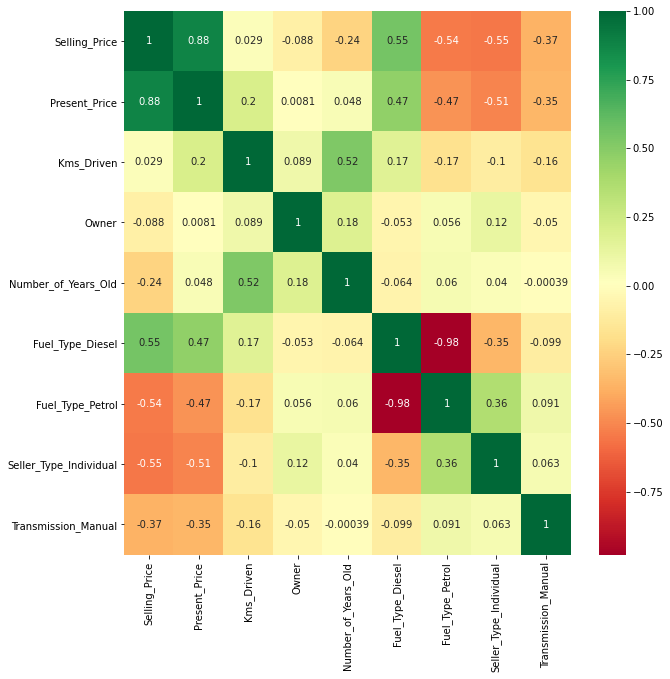

In [55]:
#Correlations of features in dataset
corrmat = c2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plot heat map
sns.heatmap(c2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Moving the selling price column at the last as it is response variable so easy for understanding

In [56]:
sell=c2['Selling_Price']
c2.drop(['Selling_Price'], axis=1, inplace=True)
c3=c2.join(sell)
c3.head()

,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,5.59,27000,0,7,0,1,0,1,3.35
1,9.54,43000,0,8,1,0,0,1,4.75
2,9.85,6900,0,4,0,1,0,1,7.25
3,4.15,5200,0,10,0,1,0,1,2.85
4,6.87,42450,0,7,1,0,0,1,4.60


#### Splitting the data accordingly

In [57]:
x=c3.iloc[:,:-1]
y=c3.iloc[:,-1]

[3.91853563e-01 4.18540592e-02 3.83549318e-04 7.68751220e-02
 2.13971549e-01 1.54824906e-02 1.33224567e-01 1.26355100e-01]


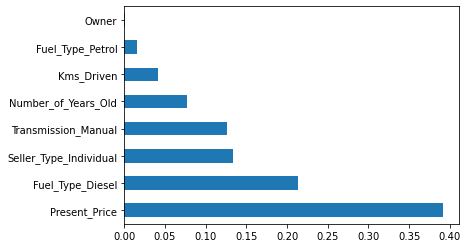

In [58]:
### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### 'Owner' has zero feature importance , so we can exclude this for further considerations

## Model Building and Training

In [59]:
x=c3.iloc[:,:-1].values
y=c3.iloc[:,-1].values

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=3)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### Decision Tree Regressor

Decision Tree Score on Training set is 1.0
Decision Tree Score on Test Set is 0.916727846049827
[0.91735978 0.84528972 0.69863646 0.97123705 0.91636849]
Accuracy: 86.98 %
Standard Deviation: 9.45 %
Mean Absolute Error: 0.8543956043956044
Mean Squared Error: 2.490341758241758
RMSE: 1.578081670333243
The r2_score is 0.916727846049827


C:\Users\bramhad\AppData\Local\Continnum\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


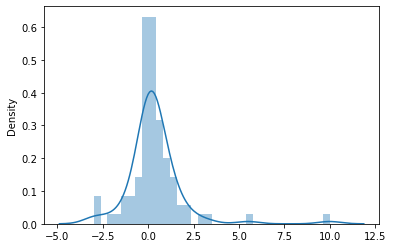

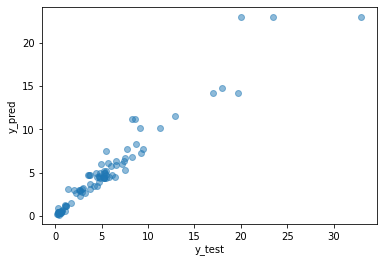

In [62]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(x_train, y_train)
y_pred=dt_reg.predict(x_test)

print("Decision Tree Score on Training set is",dt_reg.score(x_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(x_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, x_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Random Forest Regressor

Random Forest Score on Training set is 0.9105976537394405
Random Forest Score on Test Set is 0.8707964717027831
[0.94810662 0.81924082 0.63602294 0.83679838 0.93079524]
Accuracy: 83.42 %
Standard Deviation: 11.12 %
Mean Absolute Error: 0.8808188192772789
Mean Squared Error: 3.863968044146667
RMSE: 1.9656978516920314
The r2_score is 0.8707964717027831


C:\Users\bramhad\AppData\Local\Continnum\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


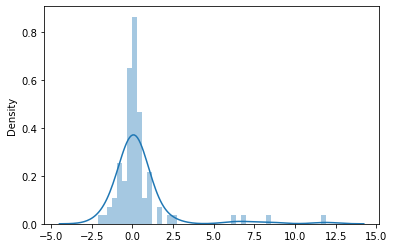

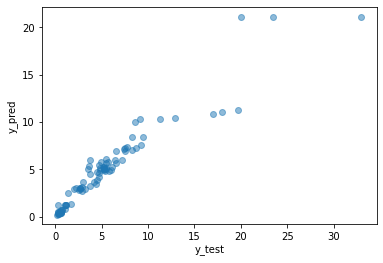

In [63]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(x_train, y_train)
y_pred=rf_reg.predict(x_test)

print("Random Forest Score on Training set is",rf_reg.score(x_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(x_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, x_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Voting Regressor

##### Voting Regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset to average the individual predictions to form a final prediction.

Voting Regresssor Score on Training set is 0.9777914513433147
Voting Regresssor Score on Test Set is 0.9004431574283005
[0.95797397 0.84065417 0.68102937 0.93327918 0.94114715]
Accuracy: 87.08 %
Standard Deviation: 10.33 %
Mean Absolute Error: 0.8480117963821934
Mean Squared Error: 2.977352579631321
RMSE: 1.7255006750596538
The r2_score is 0.9004431574283005


C:\Users\bramhad\AppData\Local\Continnum\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


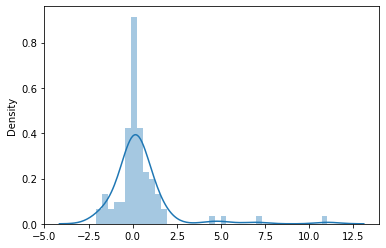

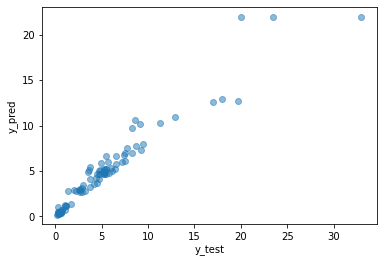

In [64]:
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor([('DecisionTree', dt_reg), ('RandomForestRegressor', rf_reg)])
vot_reg.fit(x_train, y_train)
y_pred=vot_reg.predict(x_test)

print("Voting Regresssor Score on Training set is",vot_reg.score(x_train, y_train))#Training Accuracy
print("Voting Regresssor Score on Test Set is",vot_reg.score(x_test, y_test))#Testing Accuracy

accuracies = cross_val_score(vot_reg, x_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### So, the XGBoost Regressor gave us best scores on the Training Dataset

In [66]:
import pickle
pickle.dump(vot_reg, open("vot_reg.pkl", "wb"))

# load model from file
model = pickle.load(open("vot_reg.pkl", "rb"))

model.predict([[9.85, 6900, 0, 3, 1, 0, 1, 0]])

array([7.34114864])